# Logistic Regression

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [110]:
kineDF = pd.read_csv(r'C:\Users\91730\Desktop\DFZ_Assignment\ML\LogisticRegression\run_or_walk.csv')
kineDF.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [111]:
kineDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [112]:
kineDF.shape

(88588, 11)

In [113]:
df = kineDF

In [114]:
kineDF.nunique().sort_values()

username              1
wrist                 2
activity              2
date                 12
acceleration_z    19698
acceleration_y    23957
acceleration_x    30307
gyro_y            38957
gyro_x            40988
gyro_z            51296
time              88588
dtype: int64

In [115]:
def df_summary(df):
    df_Uniq = df.nunique()
    df_Null = df.isnull().sum()
    df_Type = df.dtypes
    df_Uniq = df_Uniq.to_frame().reset_index()
    df_Null = df_Null.to_frame().reset_index()
    df_Type = df_Type.to_frame().reset_index()
    df_Uniq = df_Uniq.rename(columns= {0: 'Unique Data'})   #renaming the 0 column tp Unique data
    df_Null = df_Null.rename(columns= {0: 'Missing Data'})
    df_Type = df_Type.rename(columns= {0: 'Data Types'})
    #merge on index all the 3 dataframe, merge two first then third
    output = pd.merge(pd.merge(df_Null, df_Uniq, on='index'), df_Type, on= 'index')
    return output

df_summary(kineDF)

,index,Missing Data,Unique Data,Data Types
0,date,0,12,object
1,time,0,88588,object
2,username,0,1,object
3,wrist,0,2,int64
4,activity,0,2,int64
5,acceleration_x,0,30307,float64
6,acceleration_y,0,23957,float64
7,acceleration_z,0,19698,float64
8,gyro_x,0,40988,float64
9,gyro_y,0,38957,float64


In [116]:
kineDF.shape

(88588, 11)

In [117]:
duplicate = kineDF[kineDF.duplicated()]
duplicate

# No duplicate rows

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z


In [118]:
kineDF.drop('username',axis= 1, inplace= True)
kineDF.columns

Index(['date', 'time', 'wrist', 'activity', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [119]:
kineDF.shape

(88588, 10)

In [120]:
kineDF.drop('time',axis= 1, inplace= True)
kineDF.columns

Index(['date', 'wrist', 'activity', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [121]:
kineDF.shape

(88588, 9)

In [122]:
#Lets separate Object Columns and Numerical Columns 
# create list of numeric and object columns

Num_Cols = kineDF.select_dtypes(include= ['float64','int64']).columns.tolist()
Cat_Cols = kineDF.select_dtypes(include= ['object']).columns.tolist()

print("Numerical columns:\n", Num_Cols)
print("\n\nCategorical columns:\n", Cat_Cols)

Numerical columns:
 ['wrist', 'activity', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']


Categorical columns:
 ['date']


In [123]:
kineDF[Num_Cols].describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


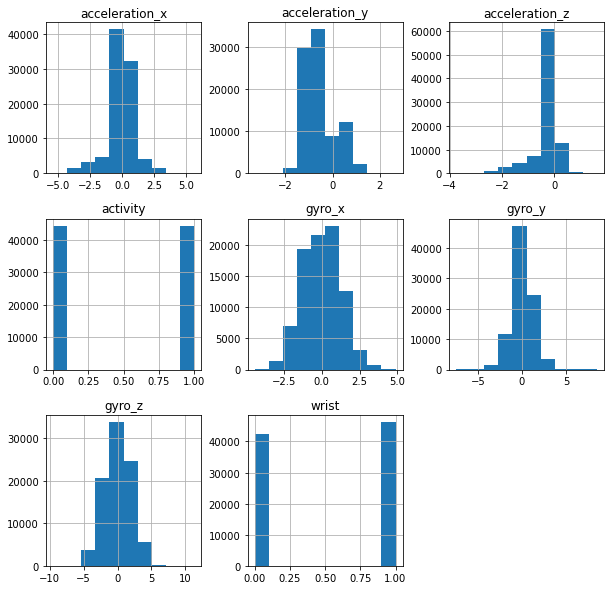

In [124]:
kineDF[Num_Cols].hist(figsize= (10,10))
plt.show()

### Inference:
* Data is skewed in acceleration_z variable
* Equal values of 0 & 1 in activity refers that people prefer both walking and running
* For wrist value, 1 is high means the people prefer to wear the device on the right wrist than the left wrist

In [125]:
kineDF[Cat_Cols].describe()

,date
count,88588
unique,12
top,2017-7-16
freq,20480


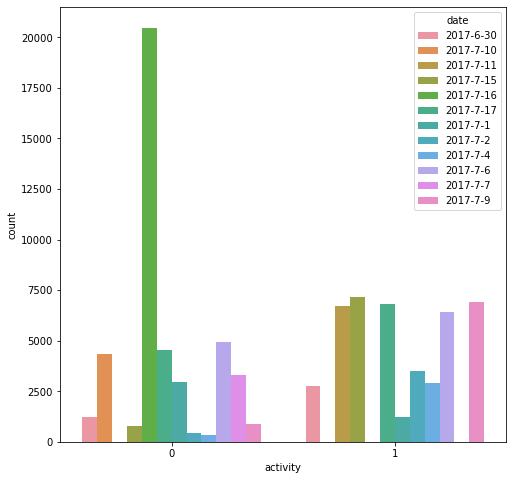

In [126]:
plt.figure(figsize= (8, 8))
sns.countplot(x = 'activity', hue = 'date', data = kineDF)
plt.show()

In [127]:
le = LabelEncoder()
kineDF['date'] = le.fit_transform(kineDF['date'])
print(kineDF['date'].head())

0    0
1    0
2    0
3    0
4    0
Name: date, dtype: int32


In [128]:
kineDF['date'].unique()

array([ 0,  2,  3,  4,  5,  6,  1,  7,  8,  9, 10, 11])

In [129]:
kineDF.head()

,date,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [130]:
kineDF.tail()

,date,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,11,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,11,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,11,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,11,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,11,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [131]:
kineDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  int32  
 1   wrist           88588 non-null  int64  
 2   activity        88588 non-null  int64  
 3   acceleration_x  88588 non-null  float64
 4   acceleration_y  88588 non-null  float64
 5   acceleration_z  88588 non-null  float64
 6   gyro_x          88588 non-null  float64
 7   gyro_y          88588 non-null  float64
 8   gyro_z          88588 non-null  float64
dtypes: float64(6), int32(1), int64(2)
memory usage: 5.7 MB


Int64Index([1, 0], dtype='int64')
1    44365
0    44223
Name: activity, dtype: int64


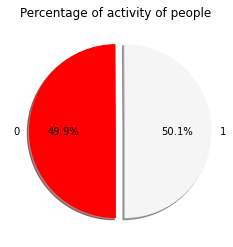

In [132]:
labels = kineDF['activity'].value_counts(sort = True).index
print(labels)
sizes = kineDF['activity'].value_counts(sort = True)
print(sizes)
plt.pie(sizes, explode= (0.1,0), labels= labels, colors= ["whitesmoke","red"], autopct= '%1.1f%%', shadow= True, startangle= 270,)
plt.title('Percentage of activity of people')
plt.show()

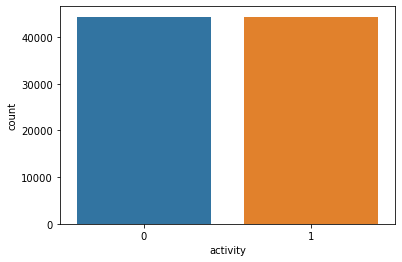

In [133]:
sns.countplot(x = 'activity', data = kineDF)
plt.show()

In [134]:
#Correlation

corr = kineDF.corr()
mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True
print(mask)

[[ True  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True]
 [False False False  True  True  True  True  True  True]
 [False False False False  True  True  True  True  True]
 [False False False False False  True  True  True  True]
 [False False False False False False  True  True  True]
 [False False False False False False False  True  True]
 [False False False False False False False False  True]]


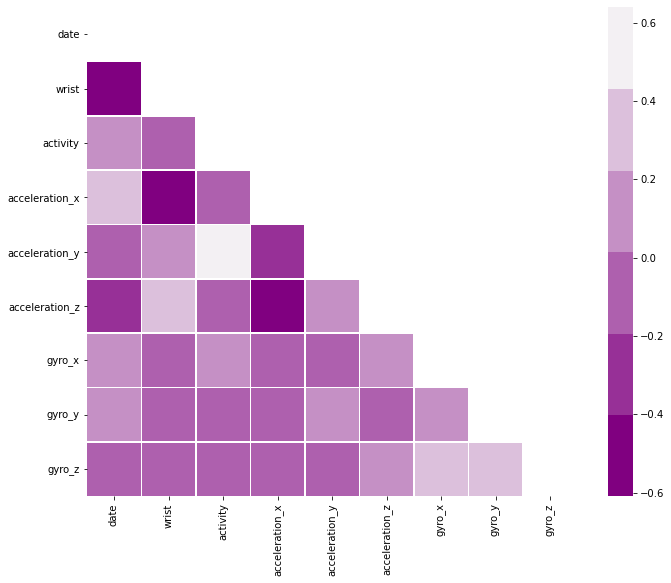

In [135]:
f, ax = plt.subplots(figsize= (11, 9))
cmap = sns.light_palette("purple", reverse= True)
sns.heatmap(corr, mask= mask, cmap= cmap, linewidths= .5)
plt.show()

## Logistic Regression Model

### Step 1: Split the data

In [136]:
X = kineDF.drop(['activity'], axis=1)
y = kineDF['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 1)
X_test.head()

,date,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
63269,8,0,0.0300,-0.7114,-0.3230,0.6402,-0.1358,-1.1960
40039,5,1,-0.3998,-1.4365,-0.2890,-0.6965,0.4417,0.1337
55251,1,0,0.3797,-1.2146,-0.1753,-0.2875,-0.2692,-0.5264
53590,6,1,-2.0247,0.5550,-0.1607,-1.6244,0.6933,-0.9669
57843,1,0,0.4922,-0.3890,-0.4261,0.6837,-0.2405,-2.0701


In [137]:
X_test.shape

(26577, 8)

In [138]:
X_train.shape

(62011, 8)

### Step 2: Fit the model to the training data

In [139]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_model.coef_

array([[ 0.12656979, -0.77442656,  0.16932405,  7.29014163, -2.63735007,
        -0.08420877, -0.20857792,  0.10753542]])

In [140]:
logistic_model.coef_.shape

(1, 8)

In [141]:
# Confusion Matrix

y_pred = logistic_model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[11983  1186]
 [ 2345 11063]]


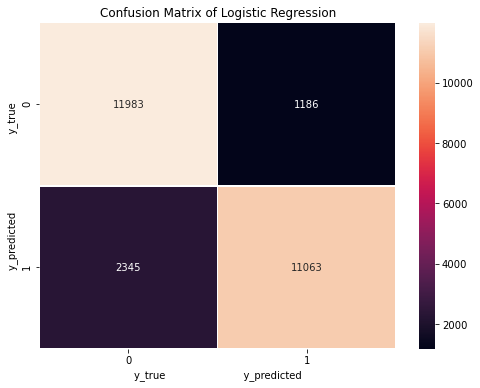

In [142]:
# Confusion matrix visualization

f, ax = plt.subplots(figsize = (8,6))
sns.heatmap(conf_mat, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel("y_true                         y_predicted")
plt.ylabel("y_predicted                         y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [143]:
# Finding Accuracy

accuracy = logistic_model.score(X_test, y_test)
print("Logistic Regression accuracy is :", accuracy * 100)

Logistic Regression accuracy is : 86.71407608082177


In [144]:
# Classification Report

print(classification_report(y_test,logistic_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87     13169
           1       0.90      0.83      0.86     13408

    accuracy                           0.87     26577
   macro avg       0.87      0.87      0.87     26577
weighted avg       0.87      0.87      0.87     26577



In [145]:
#Defining Hyperparameters

model_parameters = {
        'C': [1,10,100,1000],
        'class_weight': ['balanced', None]
    }

In [146]:
# Giving the hyperparameter to the GridSearchCV
# Using the GridSearchCV we find the hyperparameters doing an exhaustive search so that the f1 - score is improved
# Penalty uses the 'L2' normalization
# CV is a validation parameter

gscv = GridSearchCV(LogisticRegression(penalty= 'l2'), param_grid = model_parameters, cv = 5, verbose = 1, scoring = 'f1')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 1000],
                         'class_weight': ['balanced', None]},
             scoring='f1', verbose=1)

In [147]:
#Parameter setting that gave the best results on the hold out data.

print('The best parameter are -', gscv.best_params_) 

The best parameter are - {'C': 10, 'class_weight': 'balanced'}


In [148]:
# Re-fit the model with the best parameter

final_model = LogisticRegression(**gscv.best_params_)
final_model.fit(X_train, y_train)
print(final_model.coef_)
final_model.coef_.shape

[[ 0.1269744  -0.77707593  0.17119645  7.32676705 -2.65033867 -0.08580782
  -0.20928414  0.10840094]]


(1, 8)

In [149]:
# View the model coefficients
#zip forms the tuple of the column names and the model coeffs

list(zip(X_train.columns, final_model.coef_[0]))   # [0] corresponds to first row 

[('date', 0.12697440107462055),
 ('wrist', -0.777075928157102),
 ('acceleration_x', 0.17119644508323925),
 ('acceleration_y', 7.326767053313321),
 ('acceleration_z', -2.6503386734433456),
 ('gyro_x', -0.08580782340696816),
 ('gyro_y', -0.2092841442561203),
 ('gyro_z', 0.10840094285436784)]

In [152]:
accuracy_train = final_model.score(X_train, y_train)
accuracy = final_model.score(X_test, y_test)
print("Logistic Regression accuracy is :", accuracy * 100, accuracy_train * 100)

print("\n\nClassification Report\n", classification_report(y_test,final_model.predict(X_test)))

Logistic Regression accuracy is : 86.69902547315348 86.22018674106207


Classification Report
               precision    recall  f1-score   support

           0       0.84      0.91      0.87     13169
           1       0.90      0.83      0.86     13408

    accuracy                           0.87     26577
   macro avg       0.87      0.87      0.87     26577
weighted avg       0.87      0.87      0.87     26577



### Inference:
* The previous accuracy we got was 86.71. The current accuracy is 86.69.
* Previously, the f1-score was 0.87 & 0.86 respectively for 0 & 1. The current score is also 0.87 & 0.86 respectively for 0 & 1
* So defining the hyperparameters in this case wont help much.

In [155]:
#predict does the prediction based on a default threshold 0.5

y_pred = final_model.predict(X_test)             
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[11971  1198]
 [ 2337 11071]]


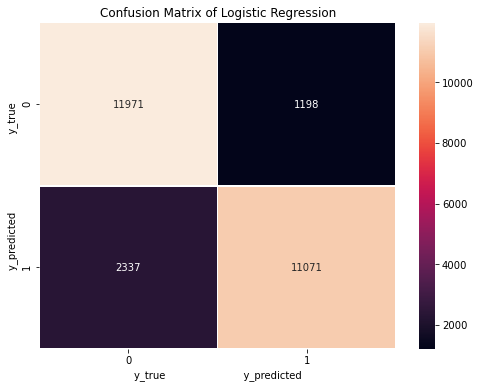

In [156]:
# Confusion matrix visualization

f, ax = plt.subplots(figsize = (8,6))
sns.heatmap(conf_mat, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel("y_true                         y_predicted")
plt.ylabel("y_predicted                         y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

## Plotting the ROC curve

In [157]:
#An ROC plot is generated by varying the threholds and plotting the FPR and TPR

def plot_roc_curve(y_train_actual, train_pred_prob, y_test_actual, test_pred_prob):
    '''
    Generate the train & test roc curve
    '''
    AUC_Train = roc_auc_score(y_train_actual, train_pred_prob)
    AUC_Test = roc_auc_score(y_test_actual, test_pred_prob)
    print("Train AUC = ", AUC_Train)
    print("Test AUC = ", AUC_Test)
    
    #plot roc_curve
    fpr, tpr, thresholds = roc_curve(y_train_actual, train_pred_prob)
    fpr_tst, tpr_tst, thresholds = roc_curve(y_test_actual, test_pred_prob)
    roc_plot(fpr, tpr, fpr_tst, tpr_tst)

In [158]:
def roc_plot(fpr, tpr, fpr_tst, tpr_tst, *args):
    '''
    Generates roc plot and defines appropriate labels
    '''
    fig = plt.plot(fpr, tpr, label = 'Train')
    fig = plt.plot(fpr_tst, tpr_tst, label = 'Test')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title("ROC curve using Logistic Regression")
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc = 'lower right')
    plt.grid(True)
    plt.show()

train_prob: 
 [0.00582515 0.07257787 0.99863873 ... 0.57063169 0.00120507 0.15782212]

y_train: 
 27538    0
5545     0
9837     1
87949    0
23849    0
        ..
21440    1
73349    1
50057    1
5192     0
77708    0
Name: activity, Length: 62011, dtype: int64



Train AUC =  0.9347893209389834
Test AUC =  0.9364889276290905


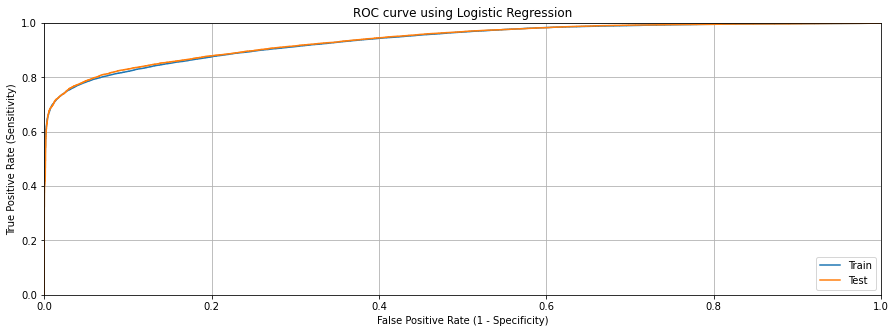

In [161]:
#The model final_mod can be used to find the proability score of each class

plt.subplots(figsize= (15, 5))   
train_prob = final_model.predict_proba(X_train)[:,1]  # has probabilities for both classes 0 and 1 so we take second column for
test_prob = final_model.predict_proba(X_test)[:, 1]   #take prob for churn ie 1
print("train_prob: \n", train_prob)
print("\ny_train: \n", y_train)
print("\n\n")
plot_roc_curve(y_train, train_prob, y_test, test_prob)  #from here it can calculate the confusion matrix but needs threshold

* The optimal cut off would be where tpr is high and fpr is low 

In [163]:
#Changing the threshold for the Model

from sklearn.metrics import accuracy_score
pred_prob_df = pd.DataFrame(final_model.predict_proba(X_test)[:,1])  # Applying predict_proba() in the final model
threshold_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
for i in threshold_list:
    print ('For Threshold = {} '.format(i))
    Y_test_pred = pred_prob_df.applymap(lambda x: 1 if x>i else 0)   # Applying threshold 
    test_accuracy = accuracy_score(y_test, Y_test_pred)
    print('Accuracy {}\n'.format(test_accuracy))

For Threshold = 0.05 
Accuracy 0.6573352899123303

For Threshold = 0.1 
Accuracy 0.7135116830342025

For Threshold = 0.15 
Accuracy 0.7499341535914512

For Threshold = 0.2 
Accuracy 0.7769123678368514

For Threshold = 0.25 
Accuracy 0.7997516649734733

For Threshold = 0.3 
Accuracy 0.8205967565940475

For Threshold = 0.35 
Accuracy 0.837227678067502

For Threshold = 0.4 
Accuracy 0.8493434172404711

For Threshold = 0.45 
Accuracy 0.8596907100124167

For Threshold = 0.5 
Accuracy 0.8669902547315348

For Threshold = 0.55 
Accuracy 0.8686458215750461

For Threshold = 0.6 
Accuracy 0.8669526282123641

For Threshold = 0.65 
Accuracy 0.8636414945253414

For Threshold = 0.7 
Accuracy 0.8558904315761748

For Threshold = 0.75 
Accuracy 0.8476878503969598

For Threshold = 0.8 
Accuracy 0.835910749896527



## Inference
* We can see that the accuracy for the y = 1, improves when the threshold value is 0.55